In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fivedongga","key":"a9e36e3e2234e59424bed29a8dbf6e5f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                                  deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                         2030-07-01 23:59:00  Getting Started     Prizes         64           False  
gan-getting-started                                  2030-07-01 23:59:00  Getting Started     Prizes        147           False  
tpu-getting-started                                  2030-06-03 23:59:00  Getting Started  Knowledge        200           False  
digit-recognizer                                     2030-01-01 00:00:00  Getting Started  Knowledge       1588           False  
titanic                                              2030-01-01 00:00:00  Getting Started  Knowledge      50218            True  
house-prices-advanced-regression-techniques          2030-01-01 00:00:00  Getting Started 

In [ ]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 52.0MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 43.3MB/s]
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 97.3MB/s]


In [ ]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test.csv  train.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from scipy import stats
import missingno as msno
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
import matplotlib.ticker as ticker

In [ ]:
ss = pd.read_csv('sampleSubmission.csv', index_col = False)
train = pd.read_csv('train.csv', index_col = False)
test = pd.read_csv('test.csv', index_col = False)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


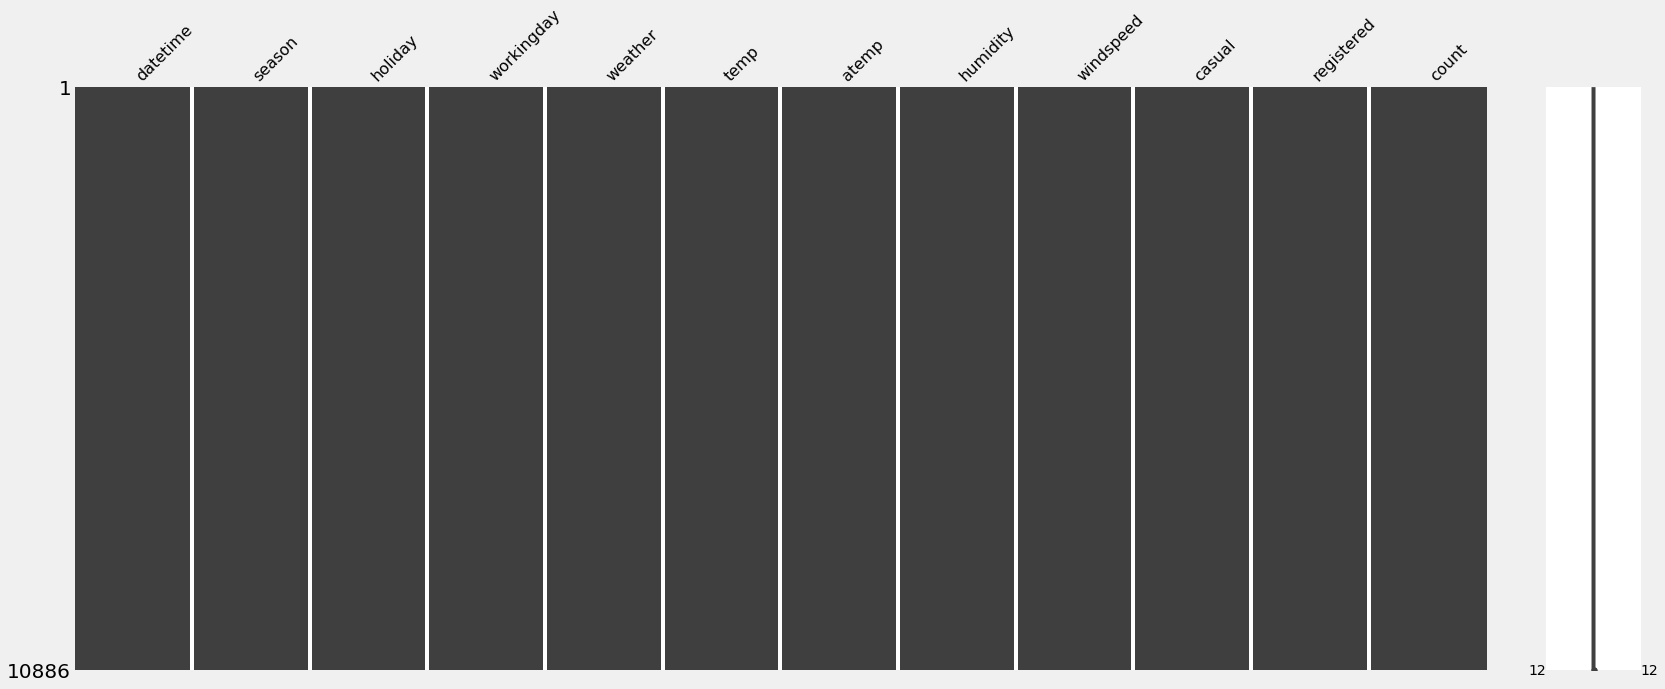

In [ ]:
msno.matrix(df = train)

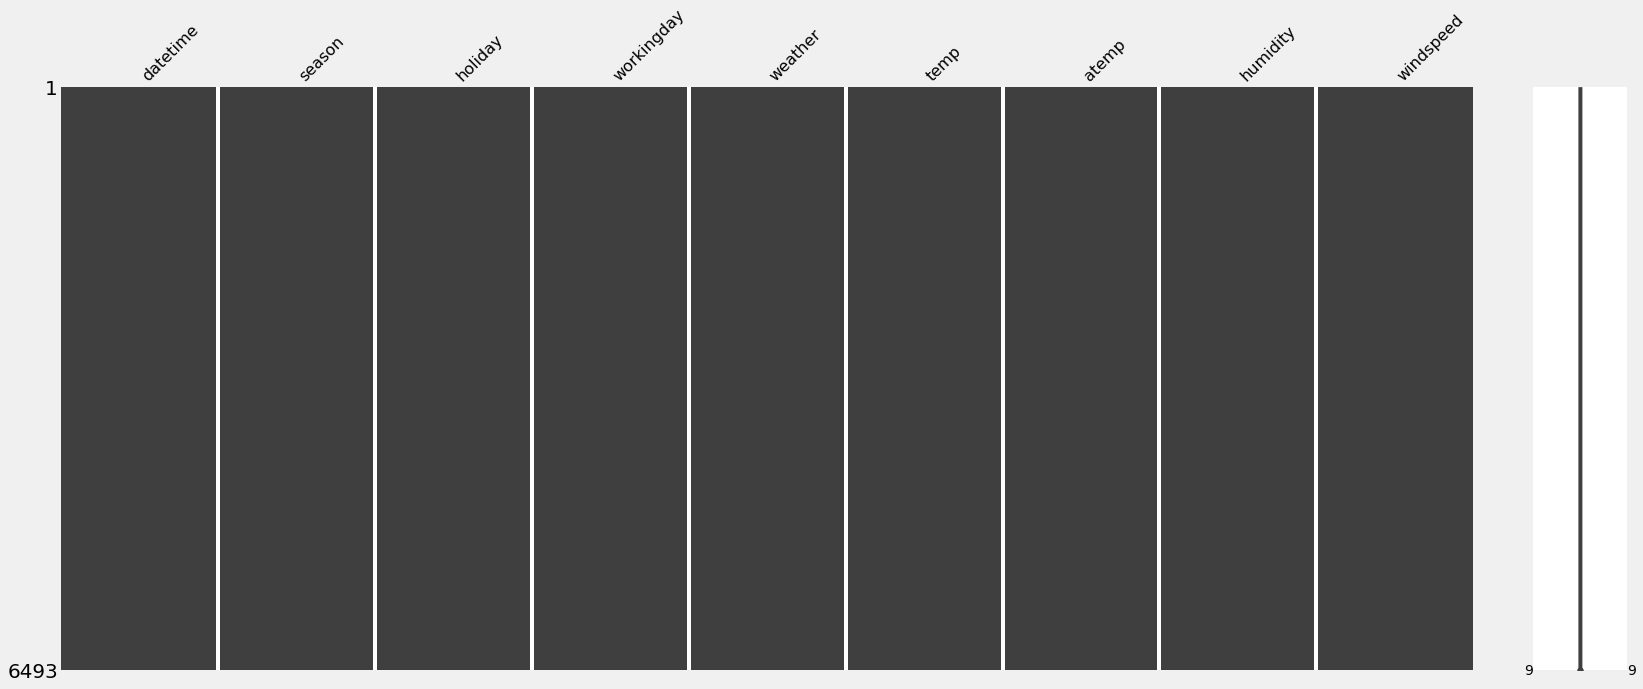

In [ ]:
msno.matrix(df = test)

In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
train['datetime'].head()

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
print(min(train['datetime']))
print(max(train['datetime']))

2011-01-01 00:00:00
2012-12-19 23:00:00


In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['date'] = train['datetime'].dt.date
train['hour'] = train['datetime'].apply(lambda x:x.hour)
train['weekday']= train['datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train['season'] = train.season.map({1: "Spring", 2: "Summer", 3:"Fall", 4:"Winter"})
train["weather"] = train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", 
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [ ]:
labels = ['year', 'month', 'date', 'hour', 'weekday', 'season', 'weather',
          'holiday', 'workingday']
for label in labels:
  train[label] = train[label].astype('category')

In [ ]:
train.drop('datetime', axis=1, inplace=True)

In [ ]:
dataTypeDf = pd.DataFrame(train.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
dataTypeDf

,variableType,count
0,int64,4
1,float64,3
2,category,2
3,category,1
4,category,1
5,category,1
6,category,1
7,category,1
8,category,1
9,category,1


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

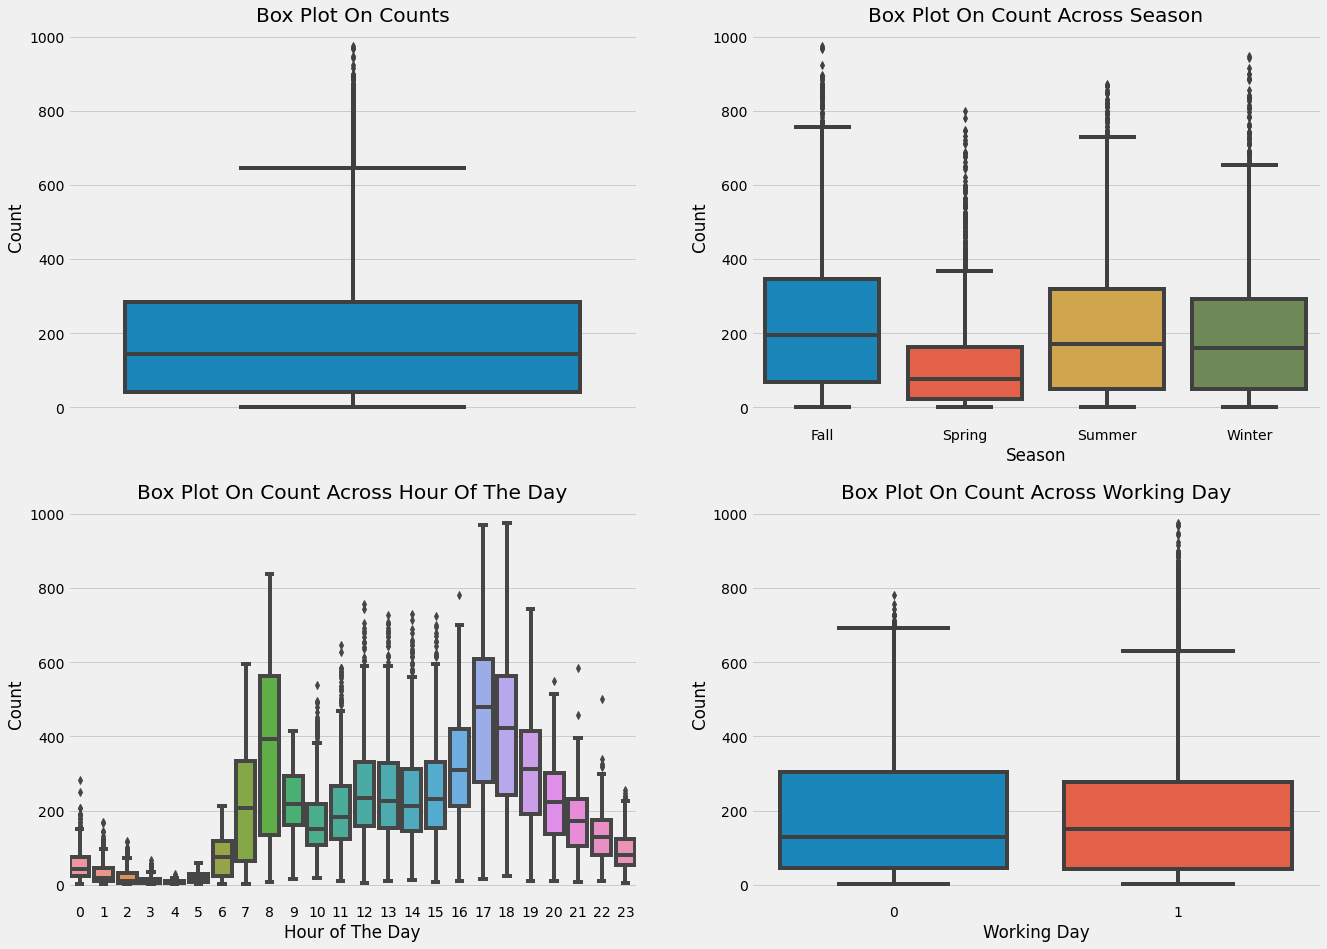

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2)
f.set_size_inches(20, 15)
sns.boxplot(data=train, y='count', orient='v', ax=ax[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v', ax=ax[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=ax[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=ax[1][1])
ax[0][0].set(ylabel='Count', title='Box Plot On Counts')
ax[0][1].set(xlabel='Season', ylabel='Count', title='Box Plot On Count Across Season')
ax[1][0].set(xlabel='Hour of The Day', ylabel= 'Count', title='Box Plot On Count Across Hour Of The Day')
ax[1][1].set(xlabel='Working Day', ylabel='Count', title='Box Plot On Count Across Working Day')


In [ ]:
real_train = train[np.abs(train['count'] - train['count'].mean()) <= (3 * train['count'].std())]

In [ ]:
print(real_train.shape)

(10739, 16)


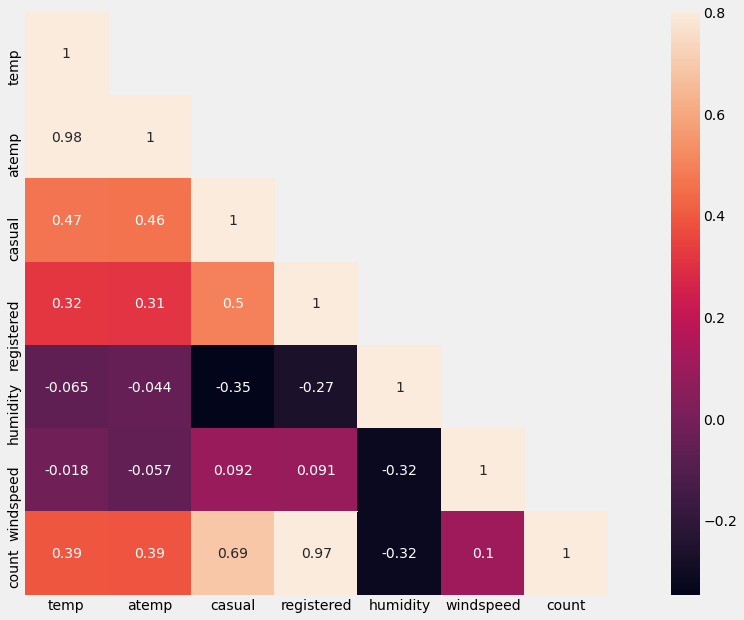

In [ ]:
corrs = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed',
                      'count']].corr()
mask = np.array(corrs)
mask[np.tril_indices_from(mask)] =False
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corrs, mask=mask, vmax=.8, square=True, annot=True)

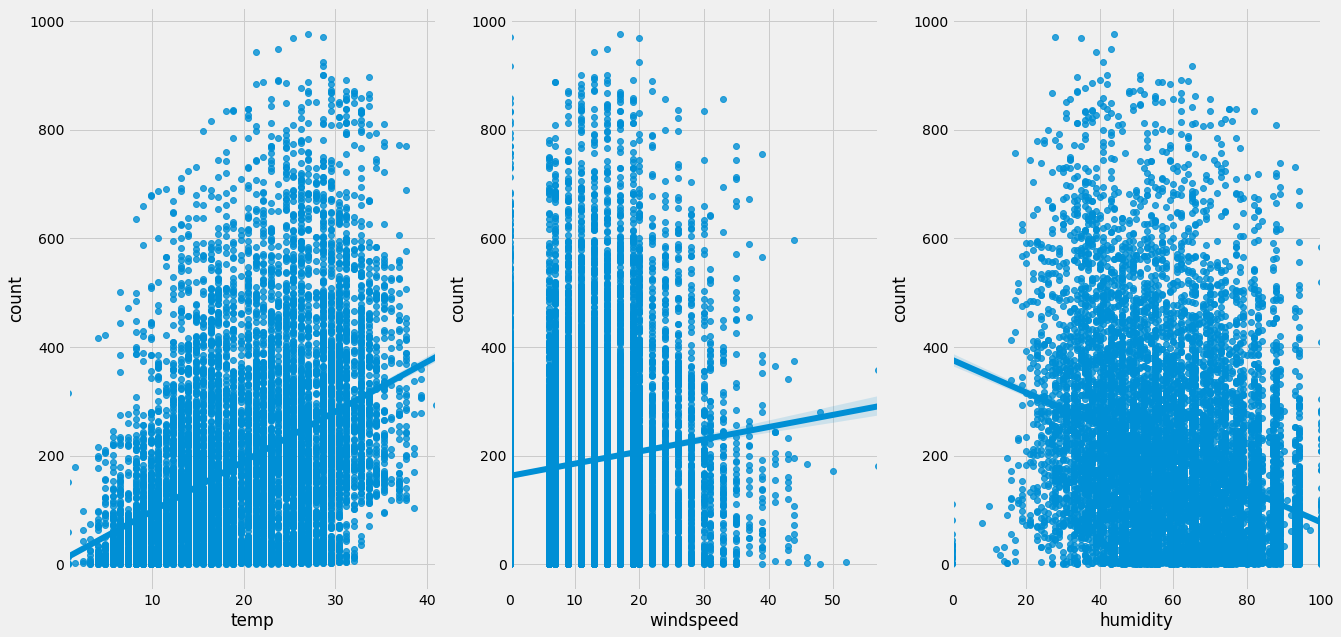

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.regplot(x='temp', y='count', data=train, ax=ax[0])
sns.regplot(x='windspeed', y='count', data=train, ax=ax[1])
sns.regplot(x='humidity', y='count', data=train, ax=ax[2])

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

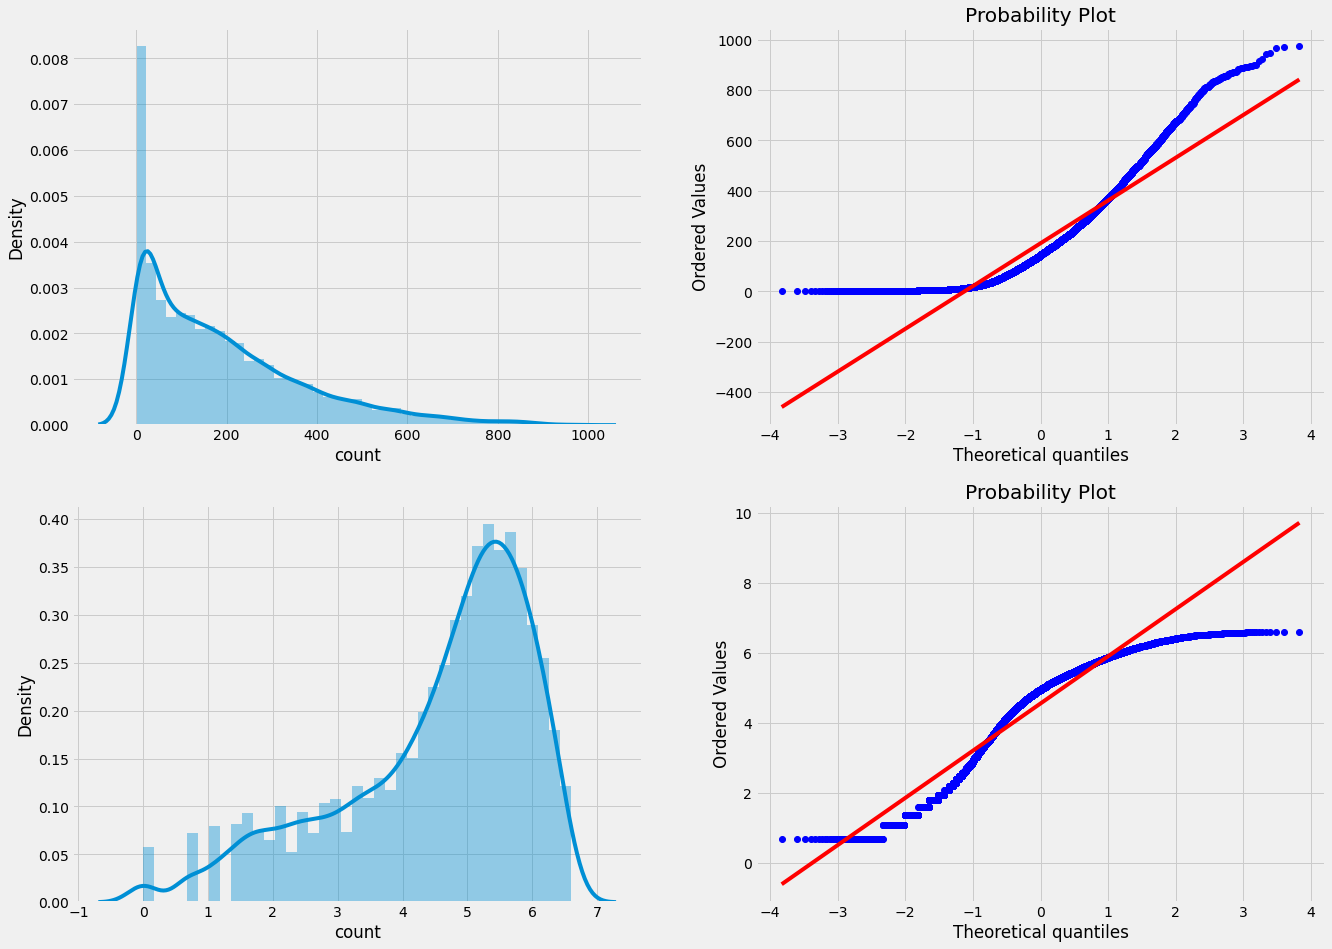

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.distplot(train['count'], ax= ax[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=ax[0][1])

sns.distplot(np.log(real_train['count']), ax=ax[1][0])
stats.probplot(np.log1p(real_train['count']), dist='norm', fit=True, plot=ax[1][1])

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

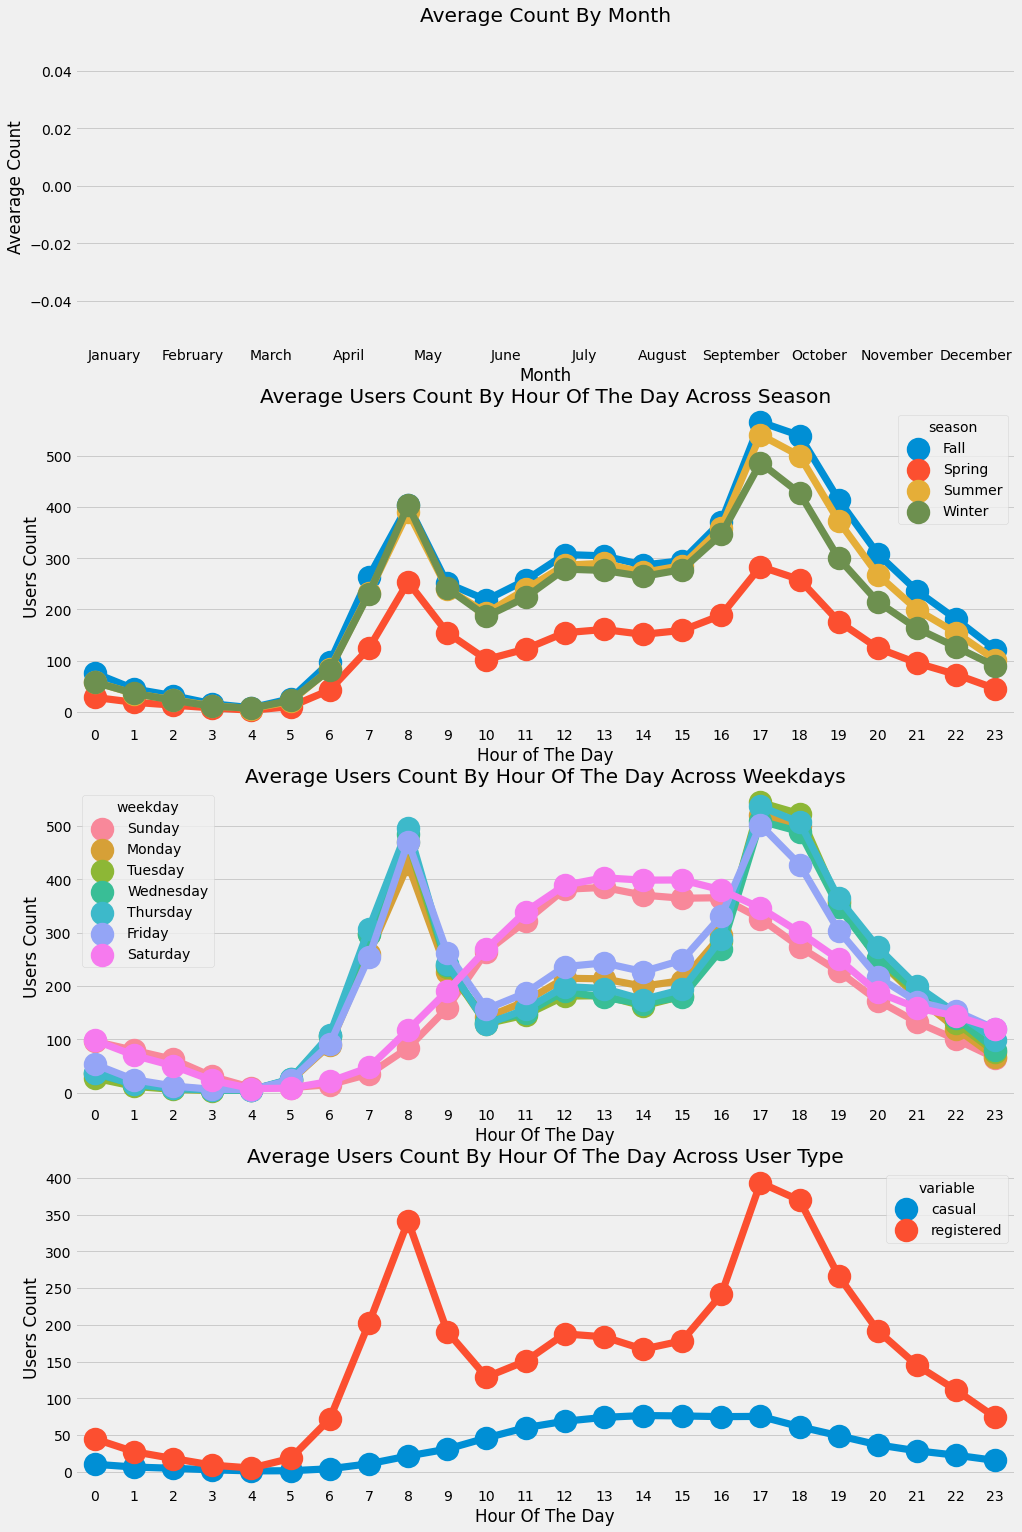

In [ ]:
f,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
f.set_size_inches(15,25)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourdf = pd.DataFrame(train.groupby(['hour', 'season'], sort=True)['count'].mean()).reset_index()
sns.pointplot(x=hourdf['hour'], y=hourdf['count'], hue=hourdf['season'],
              data = hourdf, join=True, ax=ax2)
ax2.set(xlabel = 'Hour of The Day', ylabel='Users Count',
        title= 'Average Users Count By Hour Of The Day Across Season', label='big')

hourdf = pd.DataFrame(train.groupby(['hour', 'weekday'], sort=True)['count'].mean()).reset_index()
sns.pointplot(x= hourdf['hour'], y=hourdf['count'], hue=hourdf['weekday'],
              hue_order=hueOrder, data=hourdf, join=True, ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',
        title = 'Average Users Count By Hour Of The Day Across Weekdays', label='big')

hourTransformed = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In [ ]:
dtrain = pd.read_csv('train.csv')
dtest = pd.read_csv('test.csv')

In [ ]:
data = dtrain.append(dtest)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [ ]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data['windspeed'] == 0]
dataWindNot0 = data[data['windspeed'] != 0]
rfr = RandomForestRegressor()
windColumns = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
rfr.fit(dataWindNot0[windColumns], dataWindNot0['windspeed'])

wind0Values = rfr.predict(X = dataWind0[windColumns])
dataWind0['windspeed'] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [ ]:
categories = ['season', 'holiday', 'workingday', 'weather', 'weekday',
              'month', 'year', 'hour']
numericals = ['temp', 'humidity', 'windspeed', 'atemp']
drop = ['casual', 'count', 'datetime', 'date', 'registered']

In [ ]:
for cat in categories:
  data[cat] = data[cat].astype('category')

In [ ]:
dtrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dtest = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dtest['datetime']
yLabels = dtrain['count']
yLabelsRegistered = dtrain['registered']
yLabelsCasual = dtrain['casual']

In [ ]:
dtrain = dtrain.drop(drop, axis=1)
dtest = dtest.drop(drop, axis=1)

In [ ]:
def rmsle(y, y_, convertExp=True):
  if convertExp:
    y = np.exp(y)
    y_ = np.exp(y_)

  log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
  log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
  calc = (log1 - log2) ** 2
  return np.sqrt(np.mean(calc))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

lr = LinearRegression()

yLabelsLog = np.log1p(yLabels)
lr.fit(X = dtrain, y=yLabelsLog)

preds = lr.predict(X = dtrain)
print('RMSLE Value for lr: ', rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value for lr:  0.9779728370139421


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779728219507748


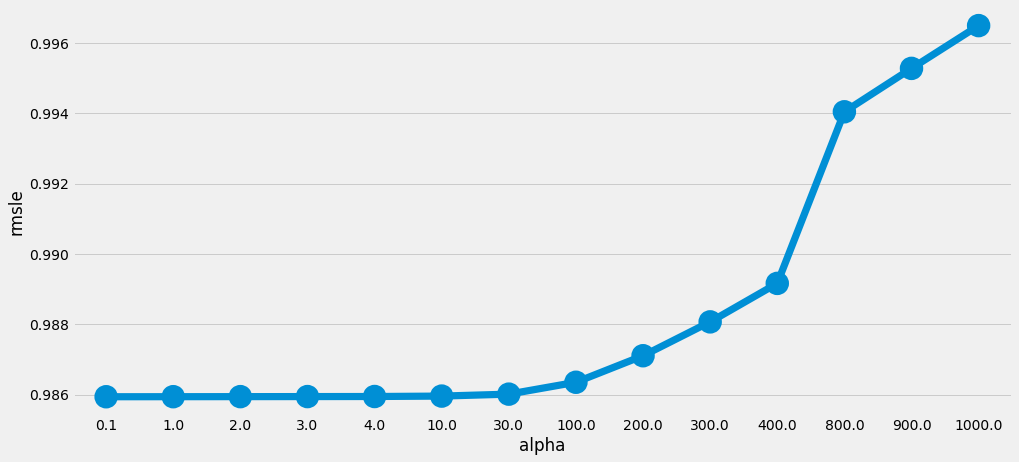

In [ ]:
r = Ridge()
ridge_params_ = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200,
                                             300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(r, ridge_params_, scoring=rmsle_scorer, cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit(dtrain, yLabelsLog)
preds = grid_ridge_m.predict(X = dtrain)
print(grid_ridge_m.best_params_)
print('RMSLE Value For Ridge Regression: ', rmsle(np.exp(yLabelsLog), np.exp(preds), False))

f, ax = plt.subplots(figsize = (15, 7))
df = pd.DataFrame(grid_ridge_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x:x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x:-x)
sns.pointplot(data = df, x='alpha', y='rmsle', ax=ax)

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9781097535485587


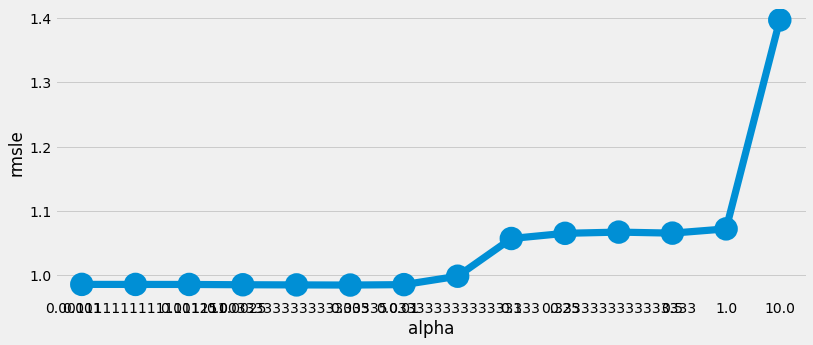

In [ ]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV(lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dtrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dtrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.5f'))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
yLabelsLog = np.log1p(yLabels)
rfr.fit(dtrain, yLabelsLog)
preds = rfr.predict(X = dtrain)
print("RMSLE Value for Random Forest: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

RMSLE Value for Random Forest:  0.10314699674520209


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01)
yLabelsLog = np.log1p(yLabels)
gbm.fit(dtrain, yLabelsLog)
preds = gbm.predict(X = dtrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.1893111713752715


Text(0.5, 1.0, 'Prediction by gbm')

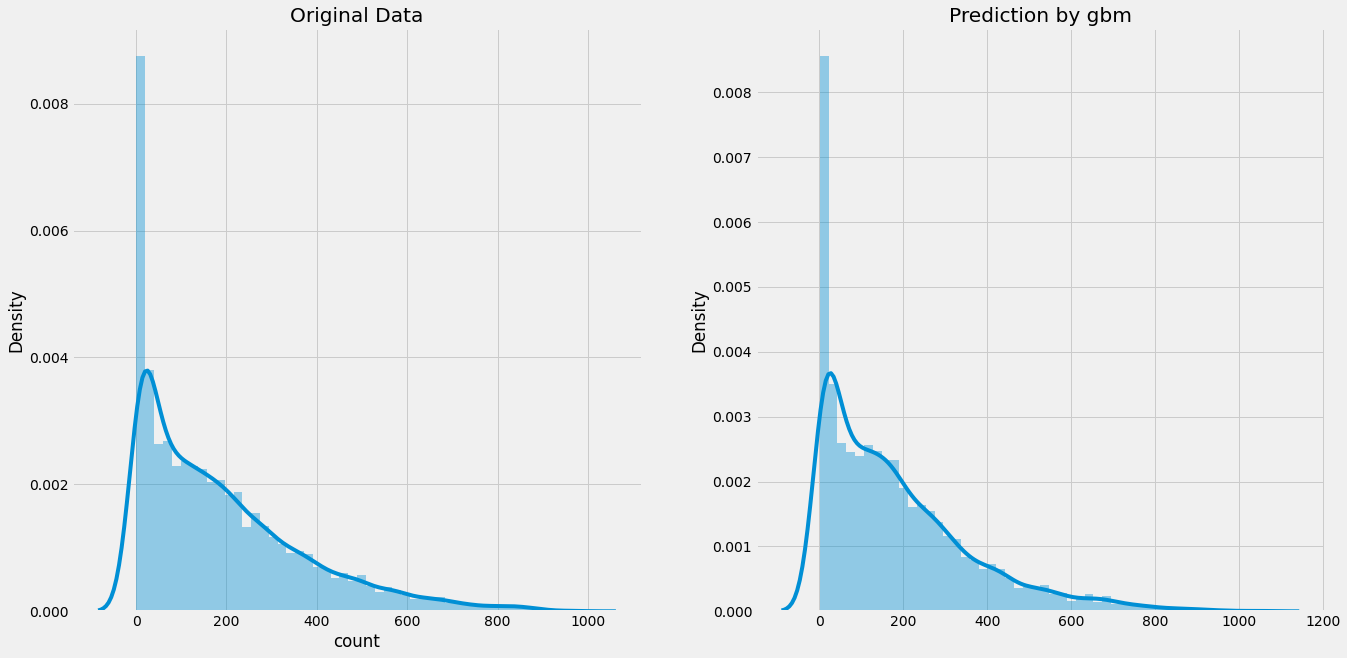

In [ ]:
predsTest = gbm.predict(X = dtest)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(yLabels, ax=ax[0], bins=50)
sns.distplot(np.exp(predsTest), ax=ax[1], bins=50)

ax[0].set_title('Original Data')
ax[1].set_title('Prediction by gbm')